## Query EFD


Craig Lage - 17-Mar-22

In [41]:
import sys, time, os, asyncio, glob

from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib widget
import pickle as pkl
import pandas as pd
import astropy.io.fits as pf
from astropy.time import Time, TimeDelta

from lsst_efd_client import EfdClient


In [2]:
client = EfdClient('summit_efd')

In [3]:
await client.get_topics()

['lsst.sal.ATAOS.ackcmd',
 'lsst.sal.ATAOS.command_applyAxisOffset',
 'lsst.sal.ATAOS.command_applyFocusOffset',
 'lsst.sal.ATAOS.command_disable',
 'lsst.sal.ATAOS.command_disableCorrection',
 'lsst.sal.ATAOS.command_enable',
 'lsst.sal.ATAOS.command_enableCorrection',
 'lsst.sal.ATAOS.command_enterControl',
 'lsst.sal.ATAOS.command_exitControl',
 'lsst.sal.ATAOS.command_offset',
 'lsst.sal.ATAOS.command_resetOffset',
 'lsst.sal.ATAOS.command_setCorrectionModelOffsets',
 'lsst.sal.ATAOS.command_setLogLevel',
 'lsst.sal.ATAOS.command_setWavelength',
 'lsst.sal.ATAOS.command_standby',
 'lsst.sal.ATAOS.command_start',
 'lsst.sal.ATAOS.logevent_appliedSettingsMatchStart',
 'lsst.sal.ATAOS.logevent_atspectrographCorrectionCompleted',
 'lsst.sal.ATAOS.logevent_atspectrographCorrectionStarted',
 'lsst.sal.ATAOS.logevent_authList',
 'lsst.sal.ATAOS.logevent_correctionEnabled',
 'lsst.sal.ATAOS.logevent_correctionOffsets',
 'lsst.sal.ATAOS.logevent_detailedState',
 'lsst.sal.ATAOS.logevent_err

In [4]:
await client.get_fields('lsst.sal.ATCamera.logevent_endReadout')

['additionalKeys',
 'additionalValues',
 'exposureTime',
 'groupId',
 'imageController',
 'imageDate',
 'imageIndex',
 'imageName',
 'imageNumber',
 'imageSource',
 'imageType',
 'imagesInSequence',
 'priority',
 'private_efdStamp',
 'private_host',
 'private_identity',
 'private_kafkaStamp',
 'private_origin',
 'private_rcvStamp',
 'private_revCode',
 'private_seqNum',
 'private_sndStamp',
 'requestedExposureTime',
 'timeStampAcquisitionStart',
 'timeStampEndOfReadout',
 'timestampAcquisitionStart',
 'timestampEndOfReadout']

In [5]:
await client.get_fields('lsst.sal.ATArchiver.logevent_imageInOODS')


['archiverName',
 'camera',
 'description',
 'obsid',
 'priority',
 'private_efdStamp',
 'private_host',
 'private_identity',
 'private_kafkaStamp',
 'private_origin',
 'private_rcvStamp',
 'private_revCode',
 'private_seqNum',
 'private_sndStamp',
 'raft',
 'sensor',
 'statusCode']

In [6]:
# Times to start looking at error codes
start = Time("2022-03-17 00:00:00Z", scale='utc')
end = Time("2022-03-17 09:00:00Z", scale='utc')

In [16]:
endReadout = await client.select_time_series('lsst.sal.ATCamera.logevent_endReadout', \
                                                ['*'],  start, end)

In [17]:
len(endReadout)

651

In [18]:
endReadout.head(2)

,additionalKeys,additionalValues,imageController,imageDate,imageIndex,imageName,imageNumber,imageSource,imagesInSequence,priority,...,private_identity,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,requestedExposureTime,timestampAcquisitionStart,timestampEndOfReadout
2022-03-17 00:00:16.414000+00:00,imageType:groupId:testType:reason:program,ENGTEST:2022-03-16T23\:59\:05.853:ENGTEST:INTR...,O,20220316,0,AT_O_20220316_000221,221,AT,1,1,...,ATCamera,1.647475e+09,77514486,1.647475e+09,e4f93dc5,419,1.647475e+09,30,1.647475e+09,1.647475e+09
2022-03-17 00:00:54.664000+00:00,imageType:groupId:testType:reason:program,ENGTEST:2022-03-16T23\:59\:05.853:ENGTEST:EXTR...,O,20220316,0,AT_O_20220316_000222,222,AT,1,1,...,ATCamera,1.647475e+09,77514486,1.647475e+09,e4f93dc5,420,1.647475e+09,30,1.647475e+09,1.647475e+09


In [23]:
endReadoutTimes = endReadout['timestampEndOfReadout']

In [19]:
inOODS = await client.select_time_series('lsst.sal.ATArchiver.logevent_imageInOODS', \
                                                ['*'],  start, end)

In [20]:
len(inOODS)

651

In [21]:
inOODS.head(2)

,archiverName,camera,description,obsid,priority,private_efdStamp,private_identity,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,raft,sensor,statusCode
2022-03-17 00:00:20.360000+00:00,ATArchiver,LATISS,file ingested,AT_O_20220316_000221,0,1.647475e+09,ATArchiver,1.647475e+09,37180,1.647475e+09,d6445373,219,1.647475e+09,,,0
2022-03-17 00:00:58.404000+00:00,ATArchiver,LATISS,file ingested,AT_O_20220316_000222,0,1.647475e+09,ATArchiver,1.647475e+09,37180,1.647475e+09,d6445373,220,1.647475e+09,,,0


In [24]:
inOODSTimes = inOODS['private_rcvStamp']

In [31]:
readout = np.array(endReadoutTimes.to_list())

In [32]:
OODS = np.array(inOODSTimes.to_list())

In [33]:
diff = OODS - readout

(2.0, 5.0)

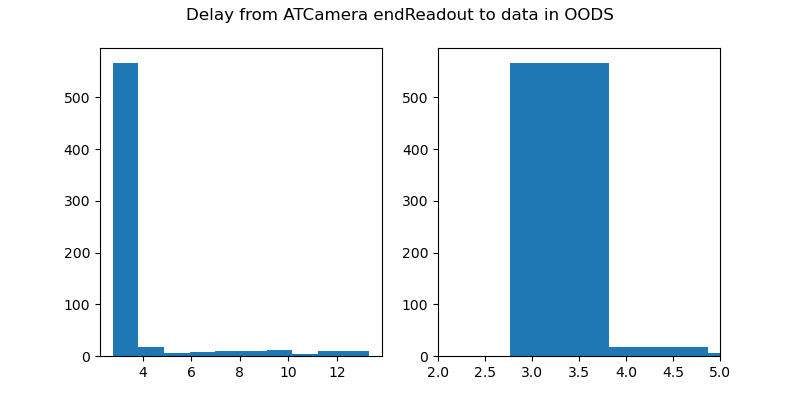

In [43]:
plt.figure(figsize = (8,4))
plt.suptitle("Delay from ATCamera endReadout to data in OODS")
plt.subplot(1,2,1)
plt.hist(diff)
plt.subplot(1,2,2)
plt.hist(diff)
plt.xlim(2.0,5.0)
#plt.savefig(